### MAIN DOCUMENT

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Load Data

In [261]:
#house pricing data
home_prices = pd.read_csv("Zillow Data.csv", parse_dates=["date"])
home_prices = home_prices[home_prices["date"].dt.year.between(2010, 2024)]
home_prices["YearMonth"] = home_prices["date"].dt.to_period("M")
home_prices["Year"]= home_prices["date"].dt.year
home_prices_avg = home_prices.groupby(["state_fip_code", "YearMonth","Year"])["median_estimated_home_values"].mean().reset_index()
home_prices_avg["YearMonth"] = home_prices_avg["YearMonth"].astype(str)
home_prices_avg.to_csv("average_home_values_by_state_2010_2024.csv", index=False)

In [262]:
fred = pd.read_csv("The Federal Reserve Economic Data.csv")
fred['Date'] = pd.to_datetime(fred['Date'], errors='coerce')
fred = fred[fred["Date"].dt.year.between(2010, 2024)]
fred["YearMonth"] = fred["Date"].dt.to_period("M")
fred["YearMonth"] = fred["YearMonth"].astype(str)
fred["Year"]= fred["Date"].dt.year

fred = fred[(fred['Indicator'] == 'Per Capita Income') & (fred['Cadence'] == 'Annual')]
df_fred = fred[["YearMonth", "Value", "Year", "state_fip_code"]]

/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/3085219870.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  fred = pd.read_csv("The Federal Reserve Economic Data.csv")


In [264]:
#income and rent data
acs = pd.read_csv("dp03_1yr.csv")
df_income = acs[["Year","fips","estimate_income_and_benefits_total_households_median_household_income_(dollars)"]]
df_income["fips"]=df_income["fips"].astype(str)
df_income["fips"]=df_income["fips"].str[:2]

/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/1316750639.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,24,90,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  acs = pd.read_csv("dp03_1yr.csv")
/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/1316750639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income["fips"]=df_income["fips"].astype(str)
/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/1316750639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [267]:
# Group by FIPS and aggregate relevant columns
df_income_group = df_income.groupby(["Year","fips"]).agg({
    "estimate_income_and_benefits_total_households_median_household_income_(dollars)": "mean"  # Compute sum of income per FIPS
}).reset_index()


In [270]:

# Load the stock price dataset
df_stocks = pd.read_csv("Real Estate Mutual Funds Stocks.csv", parse_dates=["Date"])

df_sort = df_stocks.sort_values(by=["Ticker", "Date"])
df_sort = df_sort[df_sort["Date"].dt.year.between(2012, 2024)]
df_sort["YearMonth"] = df_sort["Date"].dt.strftime("%Y-%m")
df_avg = df_sort.groupby(["Ticker","YearMonth"])["Close"].mean().reset_index()
monthly_close_sum = df_avg.groupby("YearMonth")["Close"].sum().reset_index()
monthly_close_sum.to_csv("ticker_valuation_by_month.csv", index=False)
print(monthly_close_sum.info())
print(monthly_close_sum.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  144 non-null    object 
 1   Close      144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
None
  YearMonth       Close
0   2012-01  417.013247
1   2012-02  437.005923
2   2012-03  441.558325
3   2012-04  448.009889
4   2012-05  447.954560


In [272]:
df_stock_merged = pd.merge(home_prices_avg, monthly_close_sum, on="YearMonth", how="inner")
print(df_stock_merged.head())


   state_fip_code YearMonth  Year  median_estimated_home_values       Close
0             1.0   2012-01  2012                 108688.994884  417.013247
1             1.0   2012-02  2012                 108502.263025  437.005923
2             1.0   2012-03  2012                 108261.077964  441.558325
3             1.0   2012-04  2012                 108355.317029  448.009889
4             1.0   2012-05  2012                 108882.288561  447.954560


In [273]:
#inbound migration

demographic = pd.read_csv("dp02_1yr.csv")

df_demographic = demographic[["Year","fips","estimate_residence_1_year_ago_population_1_year_and_over_different_house_in_the_u.s._different_county_different_state"]]

df_demographic["fips"]=df_demographic["fips"].astype(str)
df_demographic["fips"]=df_demographic["fips"].str[:2]

df_demographic.dropna(inplace=True) #dropped all puerto rico fip code:72
df_demographic.rename(columns={"estimate_residence_1_year_ago_population_1_year_and_over_different_house_in_the_u.s._different_county_different_state":"inbound migration"},inplace=True)
print(df_demographic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8775 entries, 0 to 8883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               8775 non-null   int64 
 1   fips               8775 non-null   object
 2   inbound migration  8775 non-null   object
dtypes: int64(1), object(2)
memory usage: 274.2+ KB
None


/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/3426789403.py:3: DtypeWarning: Columns (3,5,7,9,15,16,17,76,77,78,79,80,81,82,83,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  demographic = pd.read_csv("dp02_1yr.csv")
/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/3426789403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographic["fips"]=df_demographic["fips"].astype(str)
/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/3426789403.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [275]:
# Group by FIPS and aggregate relevant columns
df_demographic_group = df_demographic.groupby(["Year","fips"]).agg({
    "inbound migration": "first"  
}).reset_index()


In [276]:
# Rename FIPS columns to ensure consistency
home_prices_avg.rename(columns={"state_fip_code": "FIPS"}, inplace=True)
df_demographic_group.rename(columns={"fips": "FIPS"}, inplace=True)
df_fred.rename(columns={"state_fip_code": "FIPS"}, inplace=True)
df_fred.rename(columns={"Value": "Per Capita Income"}, inplace=True)
monthly_close_sum.rename(columns={"Close":"StockPrice"},inplace=True)

# Ensure Year is in the same format (integer)
home_prices_avg["FIPS"] = home_prices_avg["FIPS"].astype(int)
#df_grouped["FIPS"] = df_grouped["FIPS"].astype(int)
df_demographic_group["FIPS"] = df_demographic_group["FIPS"].astype(int)
df_fred["FIPS"]=df_fred["FIPS"].astype(int)

df_merged = pd.merge(home_prices_avg, df_fred, on=["YearMonth","Year", "FIPS"], how="inner")

print(df_merged.head())
print(df_merged.info())



   FIPS YearMonth  Year  median_estimated_home_values  Per Capita Income
0     1   2010-01  2010                 118294.358094            33849.0
1     1   2010-01  2010                 118294.358094            33686.0
2     1   2010-01  2010                 118294.358094            36797.0
3     1   2010-01  2010                 118294.358094            27743.0
4     1   2010-01  2010                 118294.358094            25072.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42938 entries, 0 to 42937
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS                          42938 non-null  int64  
 1   YearMonth                     42938 non-null  object 
 2   Year                          42938 non-null  int32  
 3   median_estimated_home_values  42938 non-null  float64
 4   Per Capita Income             42938 non-null  float64
dtypes: float64(2), int32(1), int64(1), o

/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/1095973607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fred.rename(columns={"state_fip_code": "FIPS"}, inplace=True)
/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/1095973607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fred.rename(columns={"Value": "Per Capita Income"}, inplace=True)
/var/folders/vk/h7pf2xqx4rz1kbr6tq5jpk6m0000gn/T/ipykernel_16061/1095973607.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [277]:
df_migration= pd.merge(df_merged,df_demographic_group, on=["Year", "FIPS"], how="inner")
df_migration["PIR"] = df_merged["median_estimated_home_values"] / df_merged["Per Capita Income"]

print(df_migration.head())
print(df_migration.info())

   FIPS YearMonth  Year  median_estimated_home_values  Per Capita Income  \
0     1   2013-01  2013                 112580.338422            35713.0   
1     1   2013-01  2013                 112580.338422            35364.0   
2     1   2013-01  2013                 112580.338422            38428.0   
3     1   2013-01  2013                 112580.338422            29422.0   
4     1   2013-01  2013                 112580.338422            27116.0   

  inbound migration       PIR  
0          104102.0  3.494767  
1          104102.0  3.511677  
2          104102.0  3.214783  
3          104102.0  4.263935  
4          104102.0  4.718186  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30668 entries, 0 to 30667
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS                          30668 non-null  int64  
 1   YearMonth                     30668 non-null  object 
 2   Ye

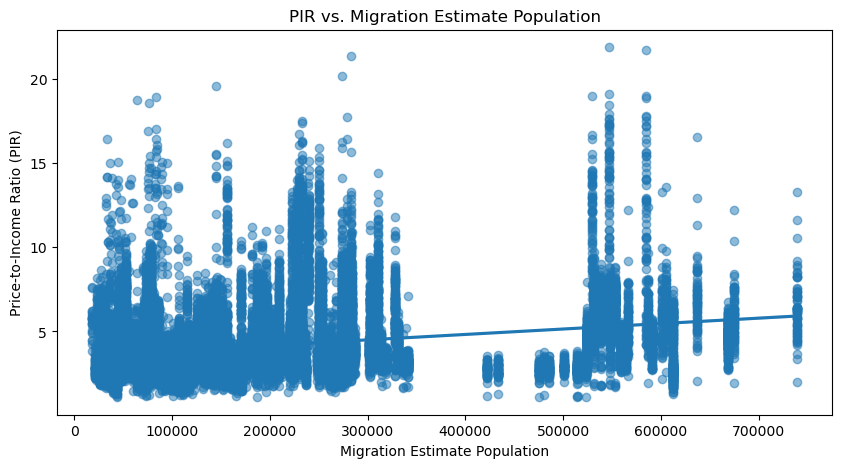

In [259]:
df_migration["PIR"] = pd.to_numeric(df_migration["PIR"], errors="coerce")
df_migration["inbound migration"] = pd.to_numeric(df_migration["inbound migration"], errors="coerce")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.regplot(data=df_migration, x="inbound migration", y="PIR", scatter_kws={'alpha':0.5})
plt.title("PIR vs. Migration Estimate Population")
plt.xlabel("Migration Estimate Population")
plt.ylabel("Price-to-Income Ratio (PIR)")
plt.show()

In [260]:
from scipy.stats import pearsonr, spearmanr

# Pearson Correlation
pearson_corr, pearson_p = pearsonr(df_migration["PIR"], df_migration["inbound migration"])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")

# Spearman Correlation
spearman_corr, spearman_p = spearmanr(df_migration["PIR"], df_migration["inbound migration"])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")

Pearson correlation: 0.259461395200976, p-value: 0.0
Spearman correlation: 0.24616385048028708, p-value: 0.0


In [278]:
df_stock = pd.merge(df_merged, monthly_close_sum, on="YearMonth",how="inner")
print(df_stock.info())
print(df_stock.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36802 entries, 0 to 36801
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS                          36802 non-null  int64  
 1   YearMonth                     36802 non-null  object 
 2   Year                          36802 non-null  int32  
 3   median_estimated_home_values  36802 non-null  float64
 4   Per Capita Income             36802 non-null  float64
 5   StockPrice                    36802 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 1.5+ MB
None
   FIPS YearMonth  Year  median_estimated_home_values  Per Capita Income  \
0     1   2012-01  2012                 108688.994884            35564.0   
1     1   2012-01  2012                 108688.994884            35161.0   
2     1   2012-01  2012                 108688.994884            38307.0   
3     1   2012-01  2012                

### Feature Engineering

In [189]:
#Price to income ratio and price to rent ratio (baselines)
df_merged["PIR"] = df_merged["median_estimated_home_values"] / df_merged["Per Capita Income"]

# Flag potential overvaluation
df_merged["overvalued"] = (df_merged["PIR"] > 5).astype(int)

# Check distribution
print(df_merged.info())
print(df_merged.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42938 entries, 0 to 42937
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS                          42938 non-null  int64  
 1   YearMonth                     42938 non-null  object 
 2   Year                          42938 non-null  int32  
 3   median_estimated_home_values  42938 non-null  float64
 4   Per Capita Income             42938 non-null  float64
 5   home_value_growth             42888 non-null  float64
 6   income_growth                 42888 non-null  float64
 7   housing_affordability_index   42938 non-null  float64
 8   PIR                           42938 non-null  float64
 9   overvalued                    42938 non-null  int64  
dtypes: float64(6), int32(1), int64(2), object(1)
memory usage: 3.1+ MB
None
    FIPS YearMonth  Year  median_estimated_home_values  Per Capita Income  \
0      1   2010-01  2010     

In [180]:
#Price to income ratio and price to rent ratio (baselines)
df_stock["PIR"] = df_stock["median_estimated_home_values"] / df_merged["Per Capita Income"]

# Flag potential overvaluation
df_stock["overvalued"] = (df_stock["PIR"] > 5).astype(int)

# Check distribution
print(df_stock.info())
print(df_stock.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36802 entries, 0 to 36801
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS                          36802 non-null  int64  
 1   YearMonth                     36802 non-null  object 
 2   Year                          36802 non-null  int32  
 3   median_estimated_home_values  36802 non-null  float64
 4   Per Capita Income             36802 non-null  float64
 5   StockPrice                    36802 non-null  float64
 6   PIR                           36802 non-null  float64
 7   overvalued                    36802 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 2.1+ MB
None
    FIPS YearMonth  Year  median_estimated_home_values  Per Capita Income  \
0      1   2012-01  2012                 108688.994884            35564.0   
1      1   2012-01  2012                 108688.994884            35161

In [190]:
df_merged.sort_values(by=["FIPS", "YearMonth"], inplace=True)  # Sort by location & time

df_merged["home_value_growth"] = df_merged.groupby("FIPS")["median_estimated_home_values"].pct_change() * 100

In [191]:
df_merged["income_growth"] = df_merged.groupby("FIPS")["Per Capita Income"].pct_change() * 100

In [192]:
df_merged["housing_affordability_index"] = df_merged["Per Capita Income"] / df_merged["median_estimated_home_values"]

In [194]:
print(df_merged.columns)
df_merged["PIR_deviation"] = df_merged["PIR"] - df_merged.groupby("FIPS")["PIR"].transform("mean")

Index(['FIPS', 'YearMonth', 'Year', 'median_estimated_home_values',
       'Per Capita Income', 'home_value_growth', 'income_growth',
       'housing_affordability_index', 'PIR', 'overvalued'],
      dtype='object')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


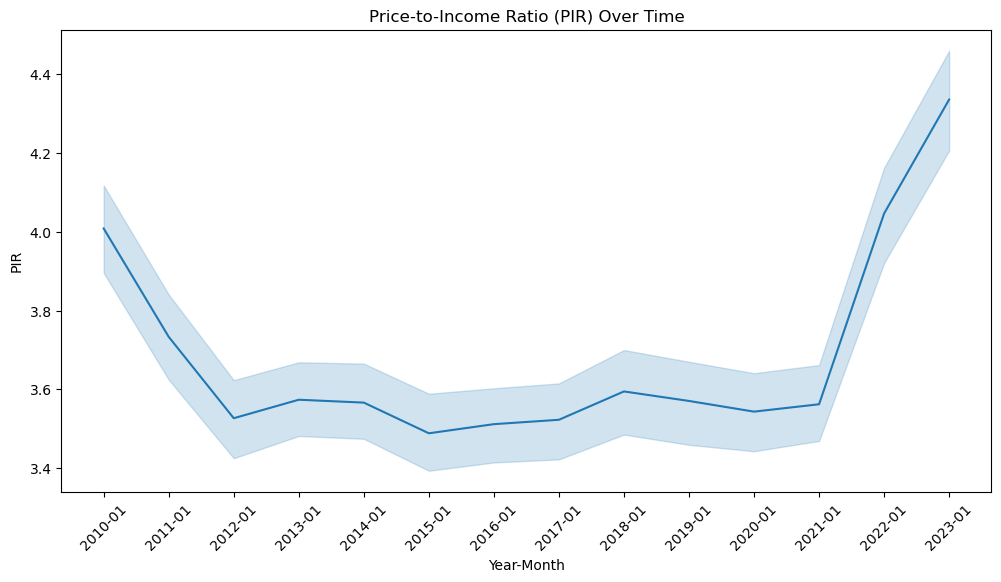

In [218]:
selected_fips = [1]  # Example FIPS codes (Replace with your selection)

df_filtered = df_merged[df_merged["FIPS"].isin(selected_fips)]  # Filter only chosen FIPS codes

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="YearMonth", y="PIR", hue="FIPS", legend=None)
plt.xticks(rotation=45)
plt.title("Price-to-Income Ratio (PIR) Over Time")
plt.ylabel("PIR")
plt.xlabel("Year-Month")
plt.show()

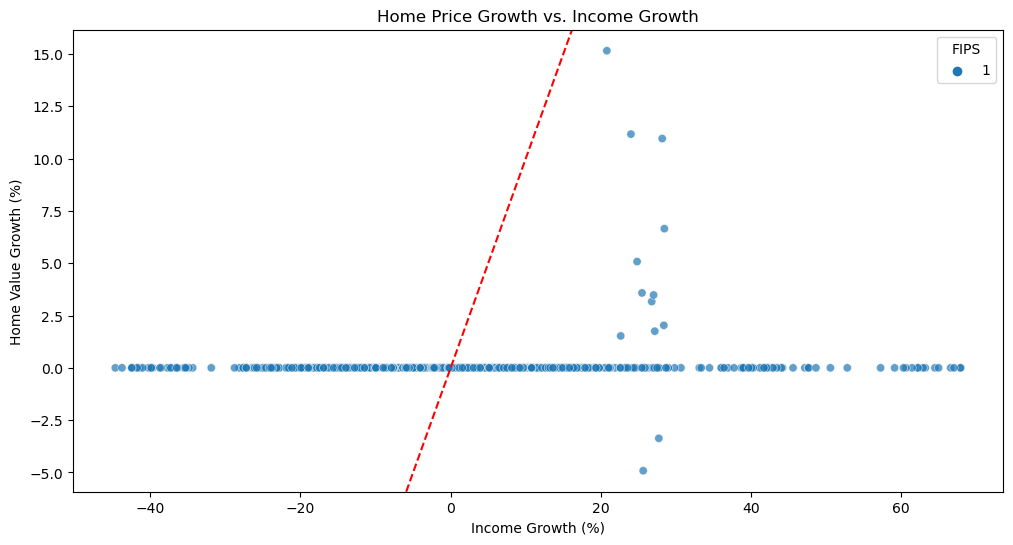

In [219]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x="income_growth", y="home_value_growth", hue="FIPS", alpha=0.7)
plt.axline((0, 0), slope=1, linestyle="--", color="red")  # Reference line (equal growth)
plt.title("Home Price Growth vs. Income Growth")
plt.xlabel("Income Growth (%)")
plt.ylabel("Home Value Growth (%)")
plt.show()

Index(['STATE', 'NAME', 'FIPS', 'LON', 'LAT', 'geometry'], dtype='object')


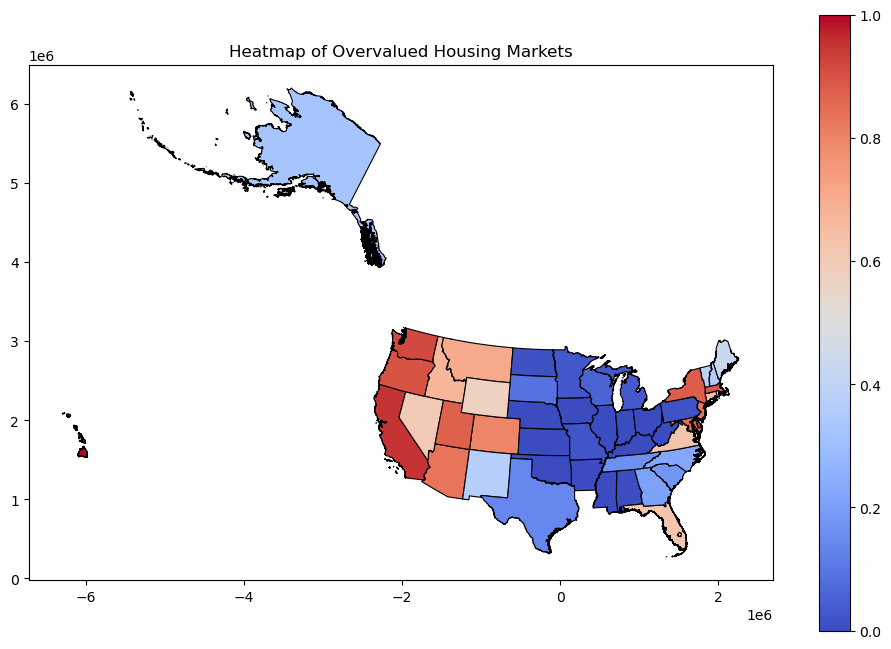

In [220]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Load USA shapefile
us_map = gpd.read_file("s_05mr24.shp")
print(us_map.columns)

# Convert 'STATEFP' in shapefile to integer (or ensure it's string)
us_map["FIPS"] = us_map["FIPS"].astype(int)  # Convert to int if necessary
us_map = us_map.to_crs("EPSG:5070")

# Group data and merge with shapefile
df_map = us_map.merge(df_merged.groupby("FIPS")["overvalued"].mean().reset_index(), 
                      left_on="FIPS", right_on="FIPS")

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 8))
df_map.plot(column="overvalued", cmap="coolwarm", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
plt.title("Heatmap of Overvalued Housing Markets")
plt.show()

<Axes: xlabel='StockPrice', ylabel='PIR'>

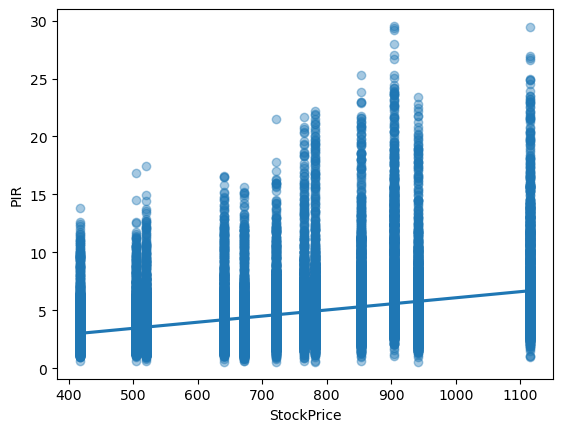

In [ ]:
selected_fips = [6]  # Example FIPS codes (Replace with your selection)

sns.regplot(data=df_stock, x="StockPrice", y="PIR", scatter_kws={'alpha':0.4})